## Introduction
''' Natural Language Processing is wide field as we know before,Here we are discussing about basic applications of NLP That is Email classification into spam and ham which is popular evry one.
we will take up an extremely popular use case of NLP - building a supervised machine learning model on text data.

## Problem Statement

 ''' Here we are going to automating to identify wheather the massage spam or ham. Nowdas spam messages are increasing randomly peoples are getting deffecult to identify wheather the message contains spam or not.So we are going to generate a classification model to classify wheather the message is ham or spam.
 '''We will try to address this problem by building a text classification model which will automate the process.
 The dataset we will use comes from Kaggle sample data set for LSTM for text classification Spam.csv and contains
 5572 observations and 5 variables, as described below
 
   v1 : Indicating wheather message is spam or ham 
   
   v2 : messages
   
   v3 : Non
   
   v4 : Non 
   
   v5 : Non 
   
  

### Loading the required libraries and modules.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import abc 

### Loading the data and performing basic data checks

In [3]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
print(df.shape)

(5572, 2)


""  Let us check the distribution of the target class which can be done using barplot.groups the 'V1' variables by counting     the number of their occurrences.
It is evident that we have more occurrences of 'ham' than 'spam' in the target variable. Still, the good thing is that the difference is not significant and the data is relatively balanced.


The baseline accuracy is important but often ignored in machine learning. It sets the benchmark in terms of minimum accuracy which the model should achieve.

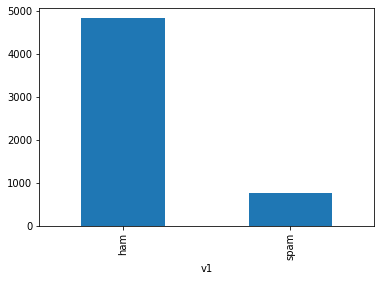

0.5179468772433596


In [6]:
df.groupby('v1').v2.count().plot.bar(ylim=0)
plt.show()
print(2886/5572) #Baseline accuracy

0.5179468772433596 # Baseline accuracy

### Pre-processing the Raw Text and Getting It Ready for Machine Learning

Now, we are ready to build our text classifier. However, this is where things begin to get trickier in NLP. The data we have is in raw text which by itself, cannot be used as features. So, we will have to pre-process the text.


For completing the above-mentioned steps, we will have to load the nltk package, 

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jonit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

With nltk package loaded and ready to use, we will perform the pre-processing tasks. The first two lines of code below imports the stopwords and the PorterStemmer modules, respectively.

The third line imports the regular expressions library, ‘re’, which is a powerful python package for text parsing. To learn more about text parsing and the 're' library, please refer to the guide'Natural Language Processing – Text Parsing'(/guides/text-parsing).

The fourth to sixth lines of code does the text pre-processing discussed above.

In [19]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
words = stopwords.words("english")

df['processedtext'] = df['v2'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).
                                                         split() if i not in words]).upper())

We will now look at the pre-processed data set that has a new column 'processedtext'.

In [20]:
print(df.shape)
df.head()

(5572, 3)


,v1,v2,processedtext
0,ham,"Go until jurong point, crazy.. Available only ...",GO JURONG POINT CRAZI AVAIL BUGI N GREAT WORLD...
1,ham,Ok lar... Joking wif u oni...,OK LAR JOKE WIF U ONI
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,FREE ENTRI WKLI COMP WIN FA CUP FINAL TKT ST M...
3,ham,U dun say so early hor... U c already then say...,U DUN SAY EARLI HOR U C ALREADI SAY
4,ham,"Nah I don't think he goes to usf, he lives aro...",NAH I THINK GOE USF LIVE AROUND THOUGH


###  spliting train data sand test data 

We have already imported necessory pakages to split our data into train and test.

we are creating an array of the target variable, called 'target'.


Then we are creating the training (X_train, y_train) and test set (X-test, y_test) arrays. It keeps 30% of the data for testing the model. The 'random_state' argument ensures that the results are reproducible.

In [21]:
target = df['v1']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.30, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(5572, 3)
(3900,)
(1672,)


### Converting Text to Word Frequency Vectors with TfidfVectorizer.

We have processed the text, but we need to convert it to word frequency vectors for building machine learning models. There are several ways to do this, such as using CountVectorizer and HashingVectorizer, but the TfidfVectorizer is the most popular one.

TF-IDF is an acronym that stands for 'Term Frequency-Inverse Document Frequency'. It is used as a weighting factor in text mining applications.


Term Frequency (TF): This summarizes the normalized Term Frequency within a document.


Inverse Document Frequency (IDF): This reduces the weight of terms that appear a lot across documents. In simple terms, TF-IDF attempts to highlight important words which are frequent in a document but not across documents. We will work on creating TF-IDF vectors for our documents.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U'))

test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))

print(vectorizer_tfidf.get_feature_names()[:10])

['aah', 'aaniy', 'aaooooright', 'aathi', 'abbey', 'abeg', 'abel', 'aberdeen', 'abi', 'abil']


Let's look at the shape of the transformed TF-IDF train and test datasets. The following line of code performs this task.

In [23]:
print(train_tfIdf.shape); print(test_tfIdf.shape)

(3900, 5139)
(1672, 5139)


### Create and Fit the Classifier.


Now, we will build the text classification model. The algorithm we will choose is the Naive Bayes Classifier, which is commonly used for text classification problems


Finally, our model is trained and it is ready to generate predictions on the unseen data. This is performed in the fifth line of code, while the sixth line prints the predicted class for the first 10 records in the test data.

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(train_tfIdf, y_train)

pred2 = nb_classifier.predict(test_tfIdf) 
print(pred2[:10])

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']


### Computing the Evaluation Metrics

We are now ready to evaluate the performance of our model on test data. Using the 'metrics.accuracy_score’ function, we compute the accuracy in the first line of code below and print the result using the second line of code. We see that the accuracy is 96.8%, which is a good score.

In [25]:
# Calculate the accuracy score: score
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

Conf_metrics_tfidf = metrics.confusion_matrix(y_test, pred2, labels=['ham', 'spam'])
print(Conf_metrics_tfidf)

0.9683014354066986
[[1458    1]
 [  52  161]]


### Evaluation of the Naïve Bayes Model

At the beginning of the guide, we established the baseline accuracy of 51.8%. Our Naive Bayes model is conveniently beating this baseline model by achieving the accuracy score of 96.8%. This also sets a new benchmark for any new algorithm or model refinements. We will try out the Random Forest Algorithm to see if it improves our result.

### Building Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)

classifier.fit(train_tfIdf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [27]:
predRF = classifier.predict(test_tfIdf) 
print(predRF[:10])

['ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham' 'ham']


In [28]:
# Calculate the accuracy score
accuracy_RF = metrics.accuracy_score(y_test, predRF)
print(accuracy_RF)

0.972488038277512


We see that the accuracy is increased to 97.5, Compairing to Naive Bayes Model nothing that much change any way both models give us a good score for this classification. 

In [18]:

Conf_metrics_RF = metrics.confusion_matrix(y_test, predRF, labels=['ham', 'spam'])
print(Conf_metrics_RF)

[[1457    2]
 [  44  169]]


### Conclusion
In this guide, you have learned the fundamentals of text cleaning and pre-processing, and building and evaluating text classification models using Naive Bayes and Random Forest Algorithms. The performance of the models is summarized below:

 
 1 : Baseline Model Accuracy - 51.8%
 
 2 : Accuracy achieved by Naive Bayes Classifier  - 96.8% 
 
 3 : Accuracy achieved by Random Forest Classifier -97.2
 
 
 We can see our both algorthams are easly beats the baseline accuracy and also our both algorithams have almost approximately  similar accuracy 